In [25]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [26]:
gold_data = pd.read_csv("gld_price_data.csv")


In [27]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [28]:
gold_data.shape


(2290, 6)

In [29]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [30]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [31]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [32]:
correlation = gold_data.corr()

<AxesSubplot:>

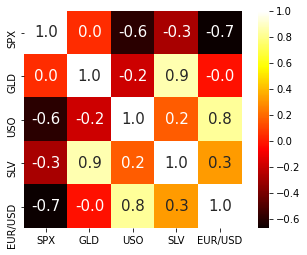

In [33]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':15}, cmap='hot')

In [34]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

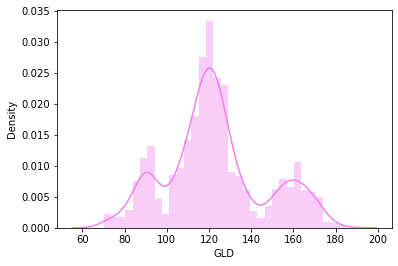

In [35]:
sns.distplot(gold_data['GLD'],color='violet')

In [36]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [37]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [38]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [40]:

regressor = RandomForestRegressor(n_estimators=100)

In [41]:

regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [42]:
pickle.dump(regressor,open('model.pkl', 'wb'))

In [43]:
model = pickle.load(open('model.pkl', 'rb'))

In [47]:
print(model.predict([[1/3/2008,1447.160034,85.57,78.370003]]))

[152.78299809]


In [18]:

test_data_prediction = regressor.predict(X_test)

In [19]:
print(test_data_prediction)


[168.49779882  81.90519983 116.23040036 127.59990086 120.82830135
 154.71239772 150.4417994  126.04490031 117.57669874 126.13620051
 116.53170123 172.72510068 141.69779896 167.72829828 115.2452999
 117.86010023 139.46460236 170.2473005  158.90300183 155.32729918
 155.06319999 125.33170007 176.73069874 157.26690352 125.11280055
  93.85059988  77.44820015 120.53110016 119.0864992  167.49249938
  88.01450009 125.07690015  91.38150062 117.76660055 121.15389901
 136.94390156 115.76800122 115.03610036 146.48979905 107.09450071
 104.37670253  87.31839789 126.5590007  117.95930036 153.71029972
 119.69040022 108.34579985 107.82159802  93.25790056 127.0385982
  75.32350023 113.61789911 121.06329974 111.32249929 118.84269899
 120.78859931 158.83650045 168.02760115 146.86089705  85.67409856
  94.18040036  86.97379861  90.58560031 118.89920081 126.42560074
 127.54920049 169.10409937 122.32139912 117.38319893  98.49590029
 167.44500022 142.89279821 132.25930251 121.09580228 120.97759946
 119.6938007

In [23]:
# error score calculation on the actual data i.e Y_test and predicted data - test_data_prediction
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error: ", error_score*100,"%") 

R squared error:  98.9151572386375 %


In [21]:
#real good error as compared to the values 
#Comparison of actual and predicted values
Y_test = list(Y_test)

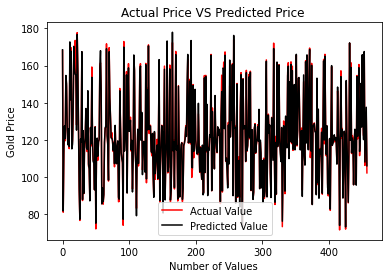

In [22]:

plt.plot(Y_test, color = 'red', label = 'Actual Value')
plt.plot(test_data_prediction, color='black', label= 'Predicted Value')
plt.title('Actual Price VS Predicted Price ')
plt.xlabel('Number of Values ')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [48]:
1+2

3